# Milestone 02: Data and (perhaps) Some Preliminary Graphs


## Flower Project 

Steps: 
1. Load Images
2. Create PCA and Classification on images (dataset has labels available)
3. Identify common/dominate colors and plot 

https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images/data

In [26]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/image_utils.py
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py


from HW10_utils import AwesomeImageClassifier



ImportError: cannot import name 'AwesomeImageClassifier' from 'HW10_utils' (/workspaces/Project/HW10_utils.py)

In [ ]:
from data_utils import KMeansClustering, SpectralClustering

In [ ]:

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# import os
from os import listdir, path
from image_utils import  open_image, make_image

In [ ]:
# Load Image
flower_files = [f for f in listdir("./data/flower") if f.endswith(".png")]
print(flower_files)
sort_flower = sorted(flower_files)
print(sort_flower)

['0029.png', '0168.png', '0180.png', '0038.png', '0064.png', '0143.png', '0077.png', '0202.png', '0138.png', '0014.png', '0175.png', '0122.png', '0004.png', '0033.png', '0094.png', '0099.png', '0114.png', '0142.png', '0162.png', '0106.png', '0062.png', '0001.png', '0167.png', '0068.png', '0186.png', '0125.png', '0176.png', '0053.png', '0035.png', '0112.png', '0088.png', '0043.png', '0070.png', '0146.png', '0017.png', '0008.png', '0116.png', '0093.png', '0110.png', '0154.png', '0049.png', '0193.png', '0152.png', '0185.png', '0195.png', '0206.png', '0173.png', '0076.png', '0203.png', '0050.png', '0196.png', '0192.png', '0210.png', '0047.png', '0132.png', '0013.png', '0208.png', '0151.png', '0205.png', '0022.png', '0025.png', '0144.png', '0083.png', '0199.png', '0065.png', '0161.png', '0182.png', '0136.png', '0009.png', '0019.png', '0184.png', '0187.png', '0145.png', '0048.png', '0069.png', '0010.png', '0055.png', '0075.png', '0204.png', '0058.png', '0108.png', '0150.png', '0126.png', '00

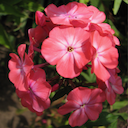

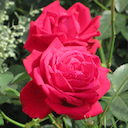

In [ ]:
fimg = open_image("data/flower/0001.png")
display(fimg)

fimg2 = open_image("data/flower/0193.png")
display(fimg2)

In [ ]:
flower_df = pd.read_csv('data/flower/flower_labels.csv')
flower_df.head()
flower_df['label'] 

0      0
1      0
2      2
3      0
4      0
      ..
205    6
206    0
207    4
208    6
209    1
Name: label, Length: 210, dtype: int64

In [ ]:
pixel_data = []
label_data = []
flower_df = pd.DataFrame(pixel_data)
flower_df["label"] = label_data
for fname in sort_flower:
  img = open_image(path.join("./data/flower", fname))
  img_cropped = img.crop((0, 0, 200,200))
  pixel_data.append(img_cropped.pixels)

train_df = pd.DataFrame(pixel_data)
train_df



,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,"(13, 22, 10, 255)","(14, 23, 9, 255)","(16, 24, 10, 255)","(16, 24, 11, 255)","(16, 24, 10, 255)","(16, 24, 10, 255)","(16, 24, 10, 255)","(17, 24, 11, 255)","(17, 26, 12, 255)","(18, 26, 12, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
1,"(38, 49, 30, 255)","(37, 50, 30, 255)","(38, 52, 30, 255)","(40, 52, 31, 255)","(40, 52, 29, 255)","(36, 50, 28, 255)","(33, 46, 27, 255)","(35, 47, 31, 255)","(39, 54, 38, 255)","(44, 62, 46, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
2,"(65, 83, 48, 255)","(72, 87, 58, 255)","(74, 90, 62, 255)","(81, 91, 57, 255)","(100, 95, 48, 255)","(115, 101, 44, 255)","(116, 99, 39, 255)","(109, 87, 32, 255)","(101, 73, 25, 255)","(94, 66, 22, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
3,"(162, 53, 102, 255)","(147, 66, 91, 255)","(156, 80, 97, 255)","(169, 73, 107, 255)","(188, 60, 124, 255)","(204, 69, 146, 255)","(215, 98, 166, 255)","(219, 124, 177, 255)","(222, 142, 185, 255)","(225, 153, 191, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
4,"(193, 52, 78, 255)","(194, 51, 76, 255)","(195, 58, 85, 255)","(197, 75, 101, 255)","(194, 61, 88, 255)","(194, 45, 74, 255)","(198, 53, 78, 255)","(196, 57, 77, 255)","(195, 49, 65, 255)","(188, 37, 53, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,"(95, 171, 41, 255)","(84, 164, 31, 255)","(81, 157, 39, 255)","(90, 160, 64, 255)","(95, 168, 79, 255)","(111, 178, 92, 255)","(109, 176, 95, 255)","(87, 165, 86, 255)","(71, 152, 72, 255)","(67, 145, 64, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
206,"(13, 14, 12, 255)","(12, 14, 11, 255)","(12, 14, 11, 255)","(12, 13, 10, 255)","(11, 13, 10, 255)","(10, 12, 9, 255)","(11, 11, 9, 255)","(10, 10, 9, 255)","(10, 10, 8, 255)","(10, 10, 8, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
207,"(5, 5, 5, 255)","(4, 4, 4, 255)","(4, 4, 4, 255)","(6, 6, 6, 255)","(5, 5, 5, 255)","(3, 3, 3, 255)","(4, 4, 4, 255)","(7, 7, 7, 255)","(9, 10, 9, 255)","(13, 15, 12, 255)",...,"(7, 7, 7, 255)","(7, 7, 7, 255)","(7, 7, 7, 255)","(8, 8, 8, 255)","(9, 9, 9, 255)","(10, 10, 10, 255)","(10, 10, 10, 255)","(8, 8, 8, 255)","(6, 6, 6, 255)","(4, 4, 4, 255)"
208,"(69, 82, 51, 255)","(71, 83, 52, 255)","(66, 77, 44, 255)","(52, 56, 37, 255)","(56, 58, 41, 255)","(64, 71, 52, 255)","(75, 81, 67, 255)","(82, 87, 75, 255)","(82, 87, 79, 255)","(83, 87, 78, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"


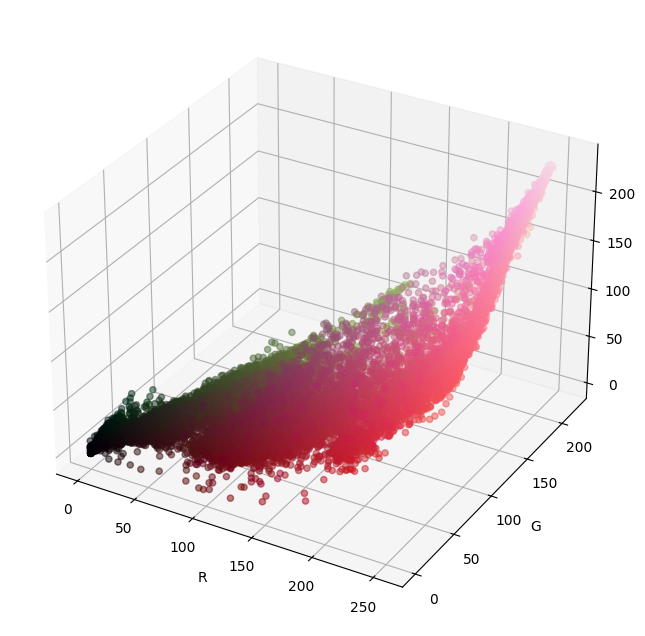

In [28]:
# Clustering images to find dominate color 
pixelObj = [{"R":r, "G":g, "B":b} for r,g,b,a in fimg.pixels]

img_df = pd.DataFrame.from_records(pixelObj)

img_df.head()

c = [(r/255, g/255, b/255) for r,g,b,a in fimg.pixels]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(img_df["R"], img_df["G"], img_df["B"], c=c, marker='o', linestyle='', alpha=0.5)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
plt.show()
# From output image, remove color and replace new colors 

In [ ]:
n_clusters=2

## Create Clustering object
km_model = KMeansClustering(n_clusters=n_clusters)

## Run the model on the pixel data
km_predicted = km_model.fit_predict(img_df)

km_predicted.head()

,clusters
0,1
1,1
2,1
3,1
4,1


In [ ]:
km_model.cluster_centers_

[[221.94143023062884, 102.29284884685582, 122.88883358221338],
 [66.98696533745293, 40.24051366225741, 30.19059573235493]]

In [ ]:
# TODO: use round() or int() to ensure our cluster centers are valid color values (ints)
color_centers = [[round(r), round(g), round(b)] for r,g,b in km_model.cluster_centers_]

print(color_centers)

[[222, 102, 123], [67, 40, 30]]


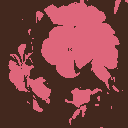

In [32]:
clustered_pxs = []

# TODO: iterate through the cluster list and append the right color for each pixel
for gidx in km_predicted["clusters"]:
  clustered_pxs.append(color_centers[gidx])

display(make_image(clustered_pxs, fimg.size[0]))